In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

import motiflets.motiflets as ml
from motiflets.competitors import *
from motiflets.plotting import *

import subprocess
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

#  Load Muscle Activation Dataset

Dataset Original Length n:  14950
Dataset Sampled Length n:  14950
../datasets/ground_truth/muscle_activation_gt.csv


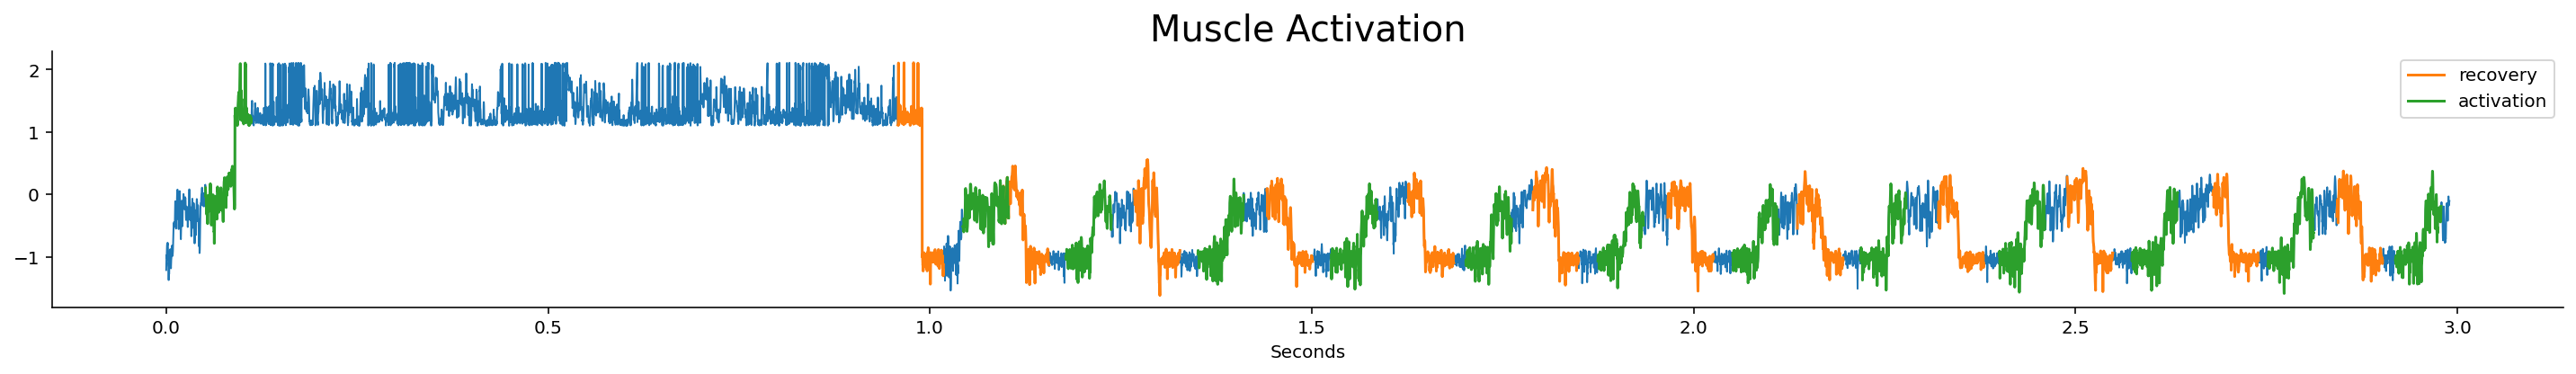

In [2]:
file = 'muscle_activation.csv'
ds_name = "Muscle Activation"
series, df_gt = ml.read_dataset_with_index(file)
data = series.values
# series = ml.as_series(data, np.arange(0, 29899, 2) / 10000, 'Seconds')
plot_dataset(file, series, ds_name=ds_name, ground_truth=df_gt)

# Parameters

In [3]:
df = pd.DataFrame() # TOP-1
df_comp = pd.DataFrame(columns=["Method", "Motif", "Extent", "k"]) # Complete Info

rerun_all_jars = False
motif_length = 600
dataset = os.getcwd() + '/../datasets/original/' + file
print(dataset)

/Users/bzcschae/workspace/motiflets/notebooks/../datasets/muscle_activation.csv


# k-Motiflets

Compute ks: 100%|█████████████████████████████████████████████████████████████| 13/13 [00:14<00:00,  1.14s/it]


Chosen window-size: 600


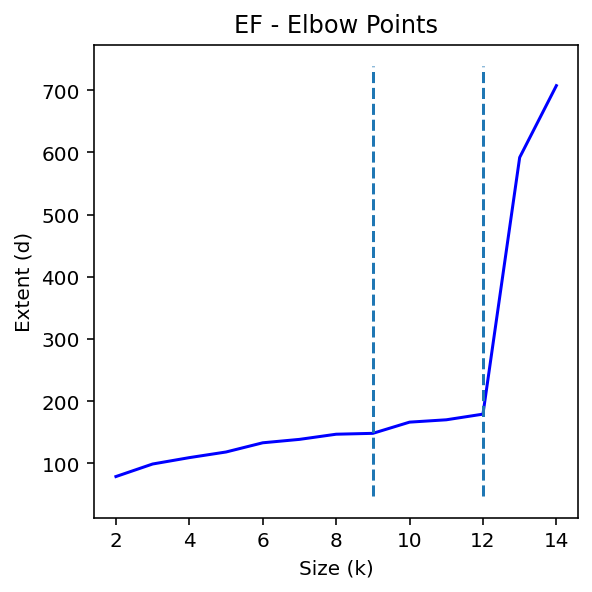

Identified Elbow Points [ 9 12]
Filtered Elbow Points [12]


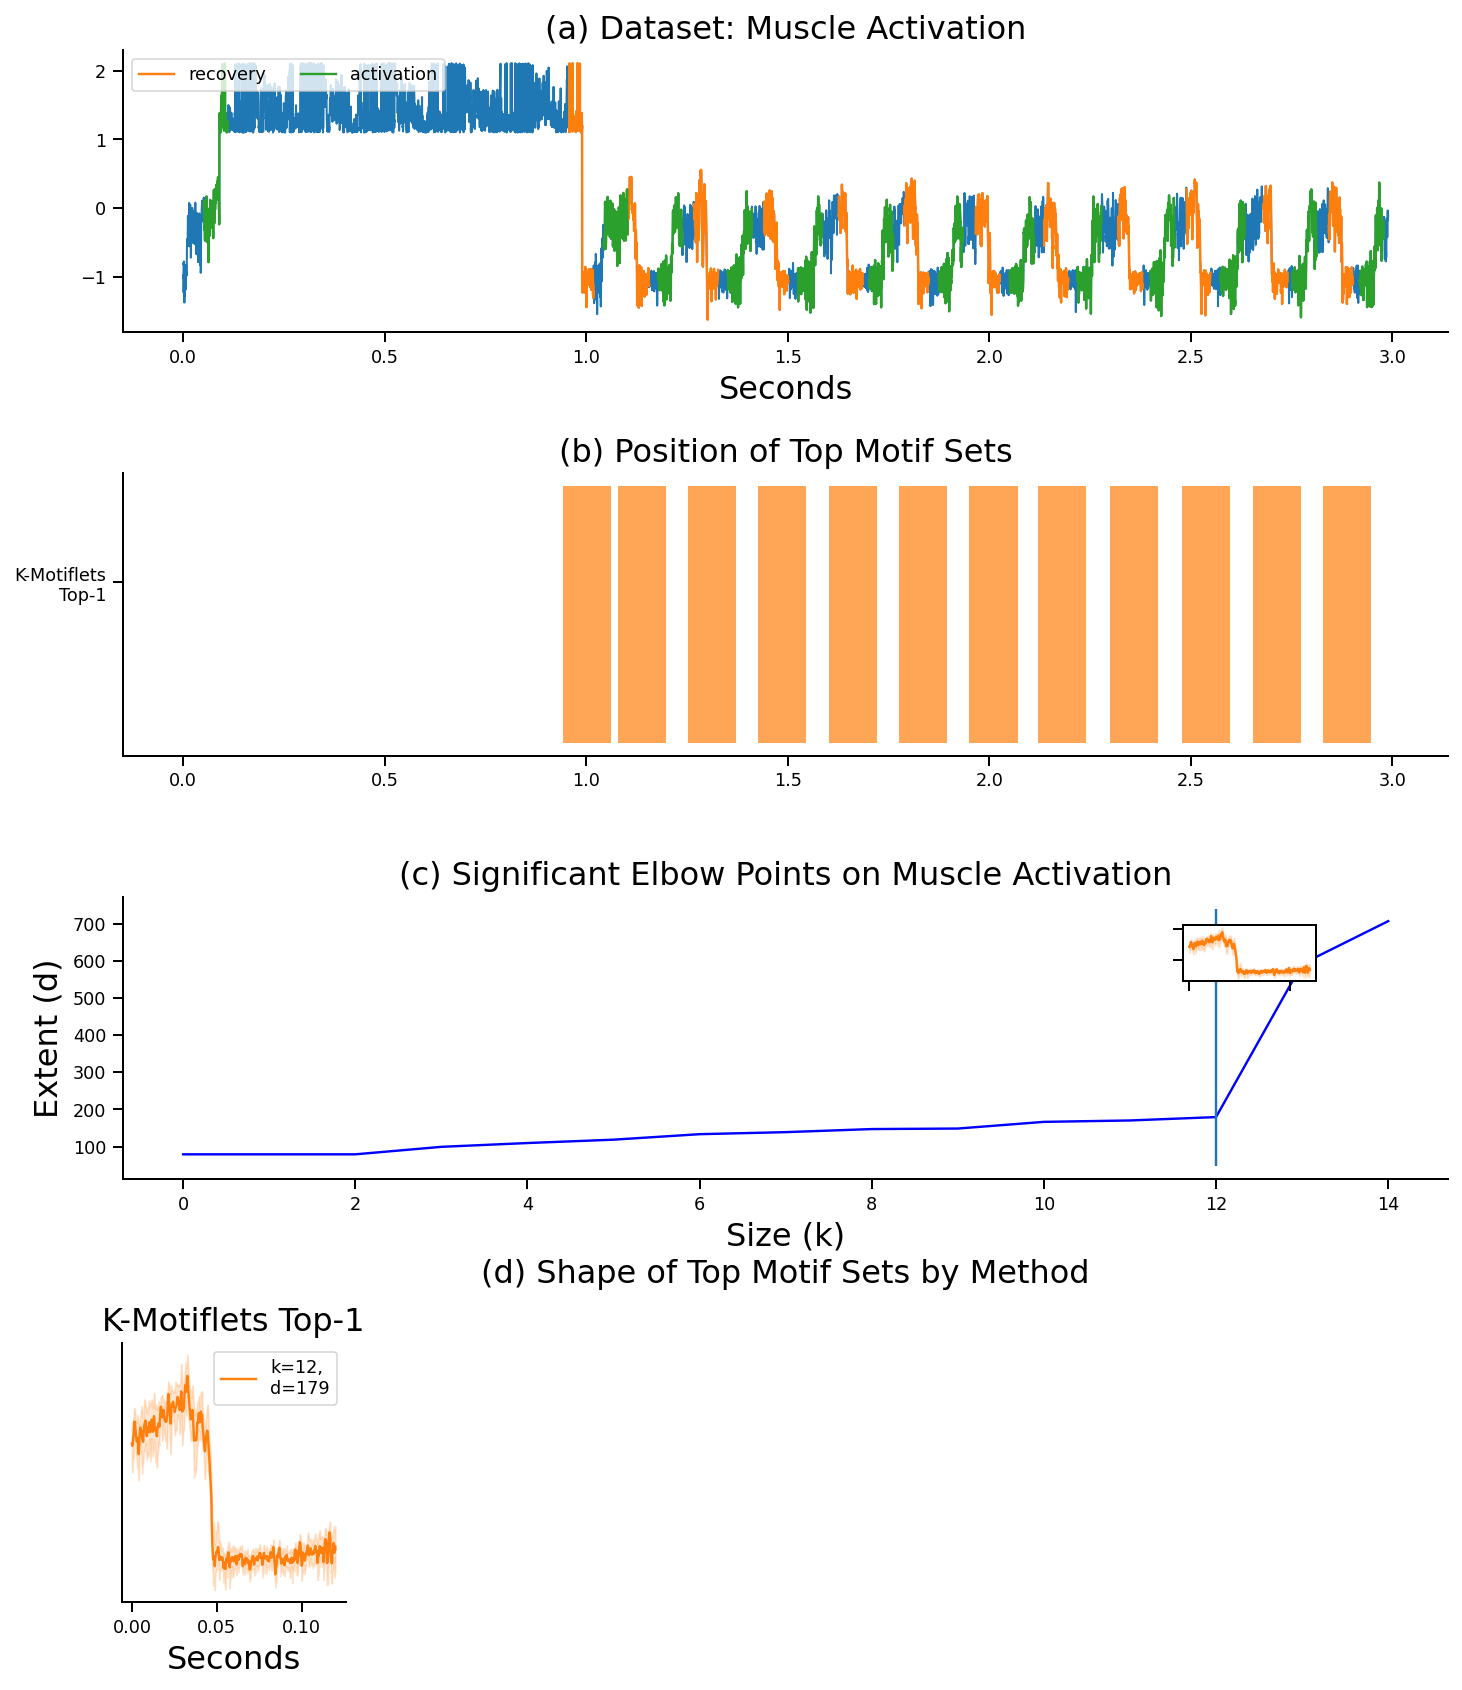

In [4]:
dists, motiflets, elbow_points = plot_elbow(
    15, series, file, ds_name=ds_name, plot_elbows=True, 
    motif_length=motif_length, method_name="K-Motiflets", ground_truth=df_gt)

In [5]:
D_full = ml.compute_distances_full(data, motif_length)

df["Motiflets Top-1"] = [motiflets[elbow_points[-1]]]
df_comp = append_all_motif_sets(df_comp, motiflets, "Motiflets", D_full)

# Set Finder
Runs java code:
- https://sites.google.com/site/timeseriesmotifsets/

In [6]:
max_r = 120
radii = np.arange(70, max_r + 1, max(1, int(max_r / 10)))
print("Radii", radii)

if rerun_all_jars:
    output = subprocess.call(['java', '-jar', 
       '../jars/set_finder.jar',
       dataset,
       'SetFinder',
       str(list(radii)),
       str(motif_length)])

Radii [ 70  82  94 106 118]


r: 91.567444 d: 91.56744384765625
r: 105.851036 d: 172.93978881835938
r: 118.27244 d: 175.11221313476562
Filtered Elbow Points [2]


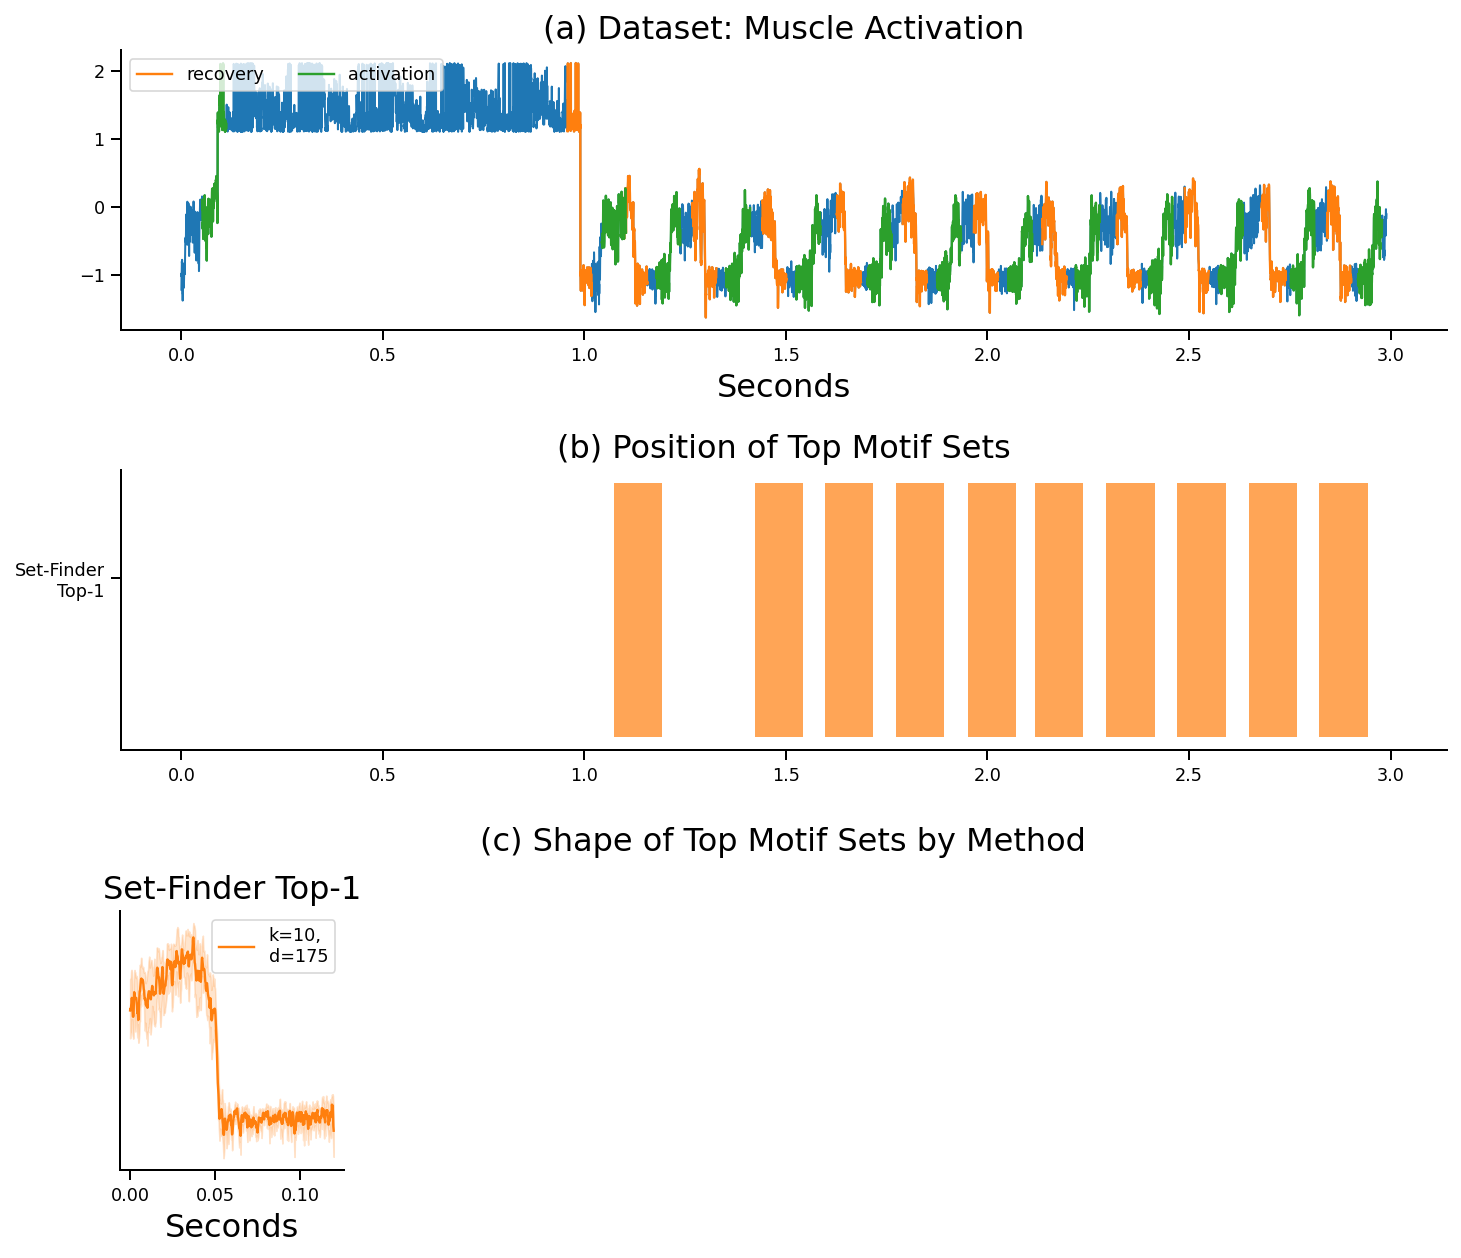

In [7]:
# run jave code first       
ms_set_finder = [
	[8052, 13314],
	[8867, 7119, 9762, 10597, 12376, 13257, 14123],
	[8861, 5369, 7112, 7986, 9754, 10590, 11475, 12355, 13246, 14116],
]
    
motifset = plot_competitors(series, ds_name, ms_set_finder, motif_length, prefix="Set-Finder", ground_truth=df_gt)

df["Set Finder Top-1"] = [motifset[-1]]
df_comp = append_all_motif_sets(df_comp, ms_set_finder, "Set Finder", D_full)


# EMMA

Runs Java Code
- https://github.com/jMotif/SAX

In [8]:
max_r = 120
radii = np.arange(70, max_r + 1, max(1, int(max_r / 10)))
print("Radii", radii)

if rerun_all_jars:
    output = subprocess.call(['java', '-jar', 
       '../jars/emma.jar',
       dataset,
       str(list(radii)),
       str(motif_length)])

Radii [ 70  82  94 106 118]


r: 108.453896 d: 108.45389556884766
r: 169.16525 d: 174.40708923339844
r: 176.86942 d: 176.86941528320312
Filtered Elbow Points [2]


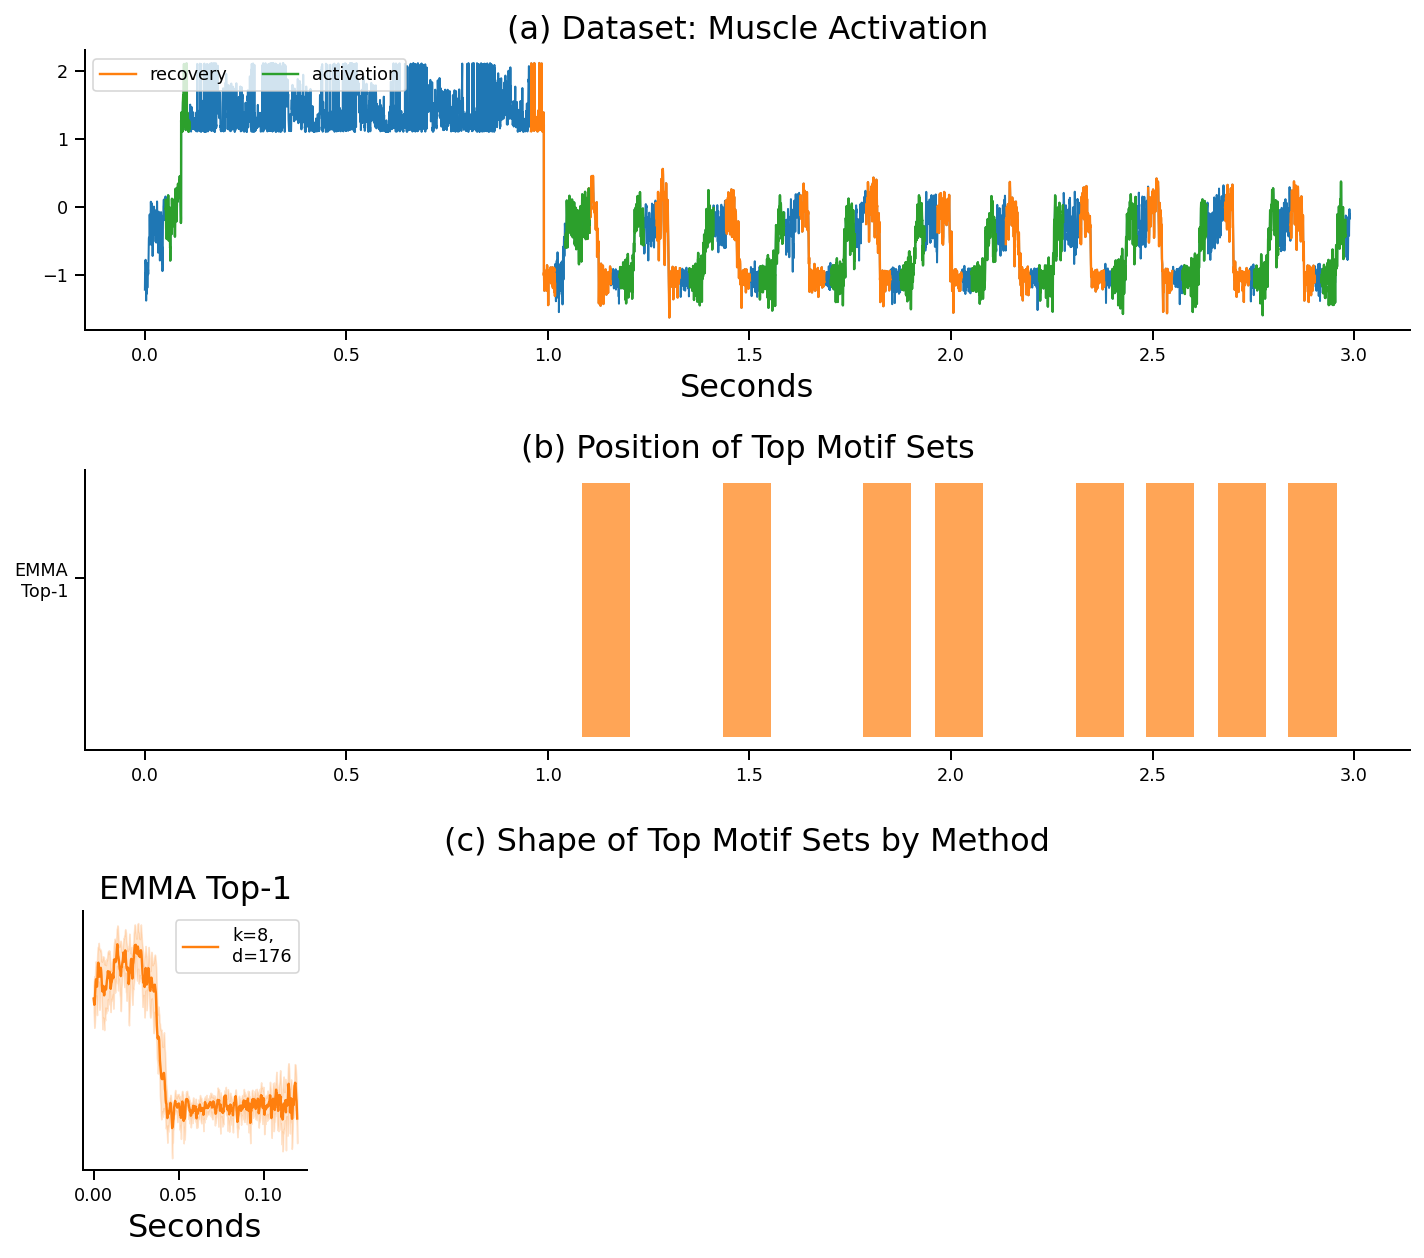

In [9]:
# run jave code first       
ms_emma = [
	[9830, 13341],
	[5439, 8926, 9803, 11553, 12423, 13312],
	[5420, 7170, 8904, 9798, 11550, 12415, 13310, 14184],
]

motifset = plot_competitors(series, ds_name, ms_emma, motif_length, prefix="EMMA", ground_truth=df_gt)

df["EMMA Top-1"] = [motifset[-1]]
df_comp = append_all_motif_sets(df_comp, ms_emma, "EMMA", D_full)

# Valmod Motif Sets
based on own (fixed-length) implementation

r: 78.9173 d: 78.91729736328125
r: 163.00168 d: 176.4746856689453
Filtered Elbow Points [1]


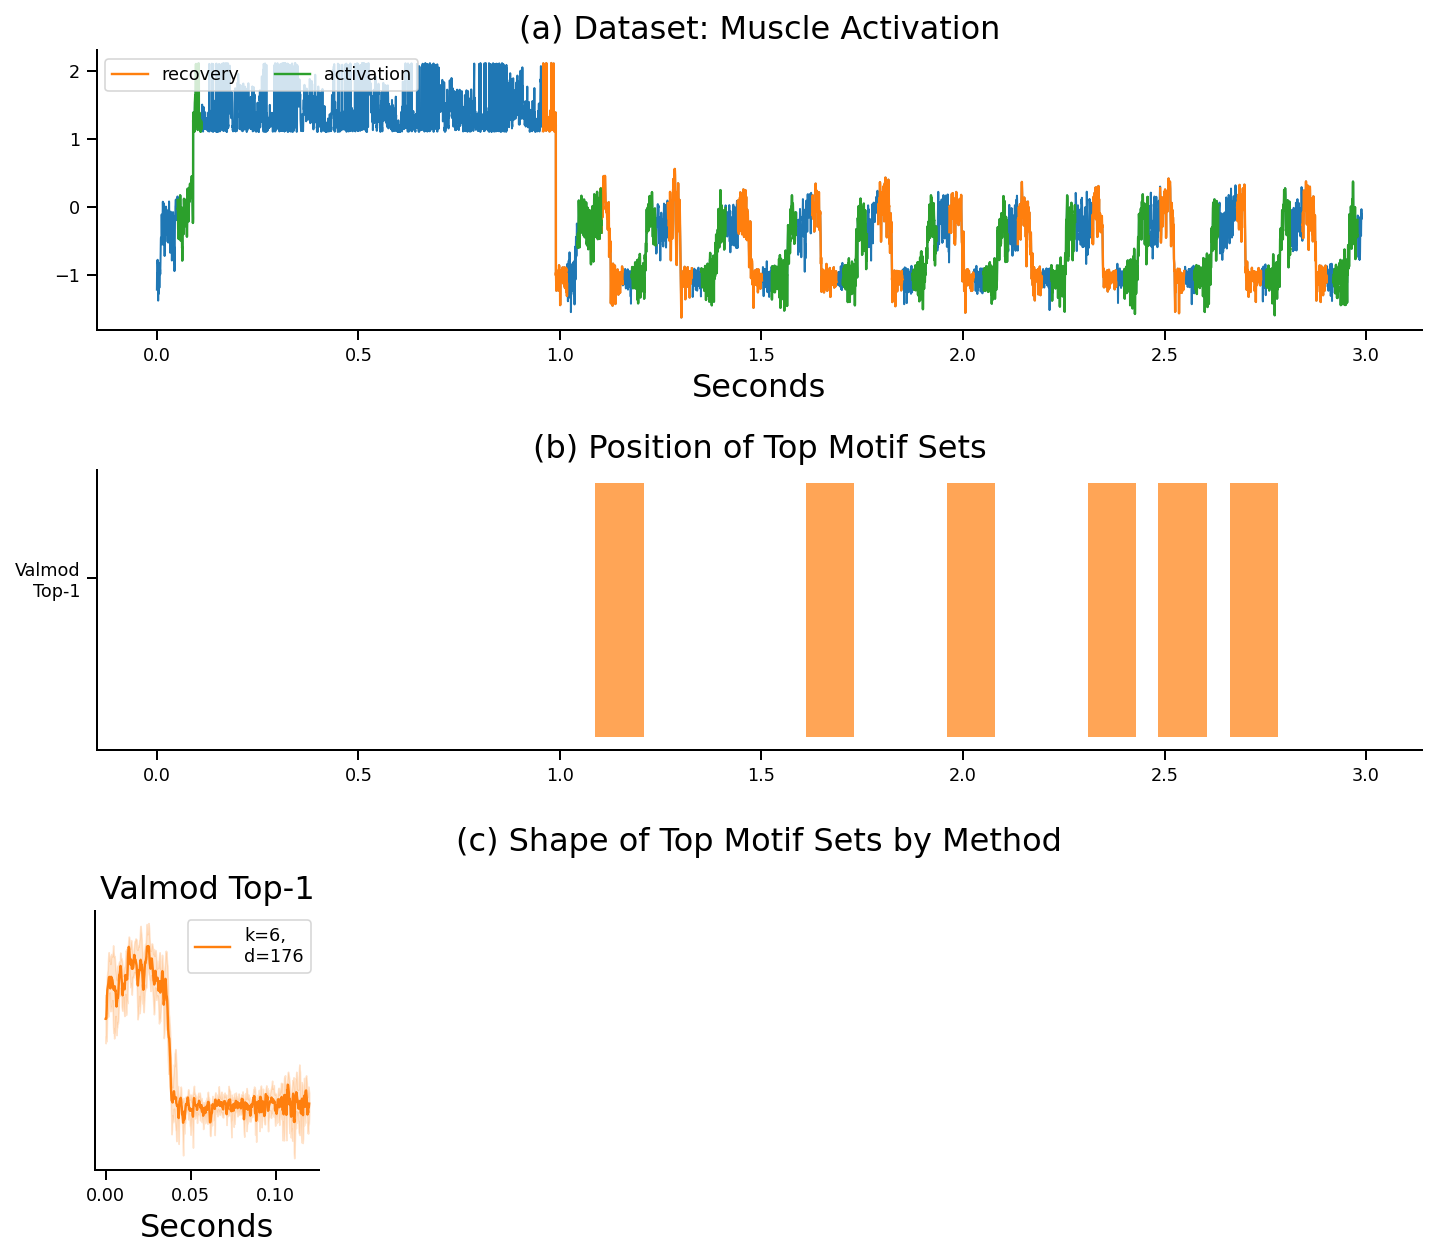

In [18]:
max_d = 200
data_raw = data.to_numpy() if isinstance(data, pd.Series) else data    
ms_valmod = [motifset for (motifset, _) in get_valmod_motif_set_ranged(data_raw, file, motif_length, max_d)]
motifset = plot_competitors(series, ds_name, ms_valmod, motif_length, prefix="Valmod", ground_truth=df_gt)

df["VALMOD Top-1"] = [motifset[-1]]
df_comp = append_all_motif_sets(df_comp, ms_valmod, "VALMOD", D_full)

# Learning Motifs
See Java Code

In [11]:
max_r = 100
radii = np.arange(10, max_r + 1, max(1, int(max_r / 10)))
print("Radii", radii)

if rerun_all_jars:
    output = subprocess.call(['java', '-jar', 
       '../jars/latent_motifs.jar',
       dataset,
       str(list(radii)),
       str(motif_length)])

Radii [ 10  20  30  40  50  60  70  80  90 100]


r: 137.77147 d: 137.77146911621094
r: 139.95978 d: 140.23492431640625
r: 178.36778 d: 178.36778259277344
r: 150.15805 d: 175.94102478027344
r: 173.23216 d: 175.3888702392578
Filtered Elbow Points [3]


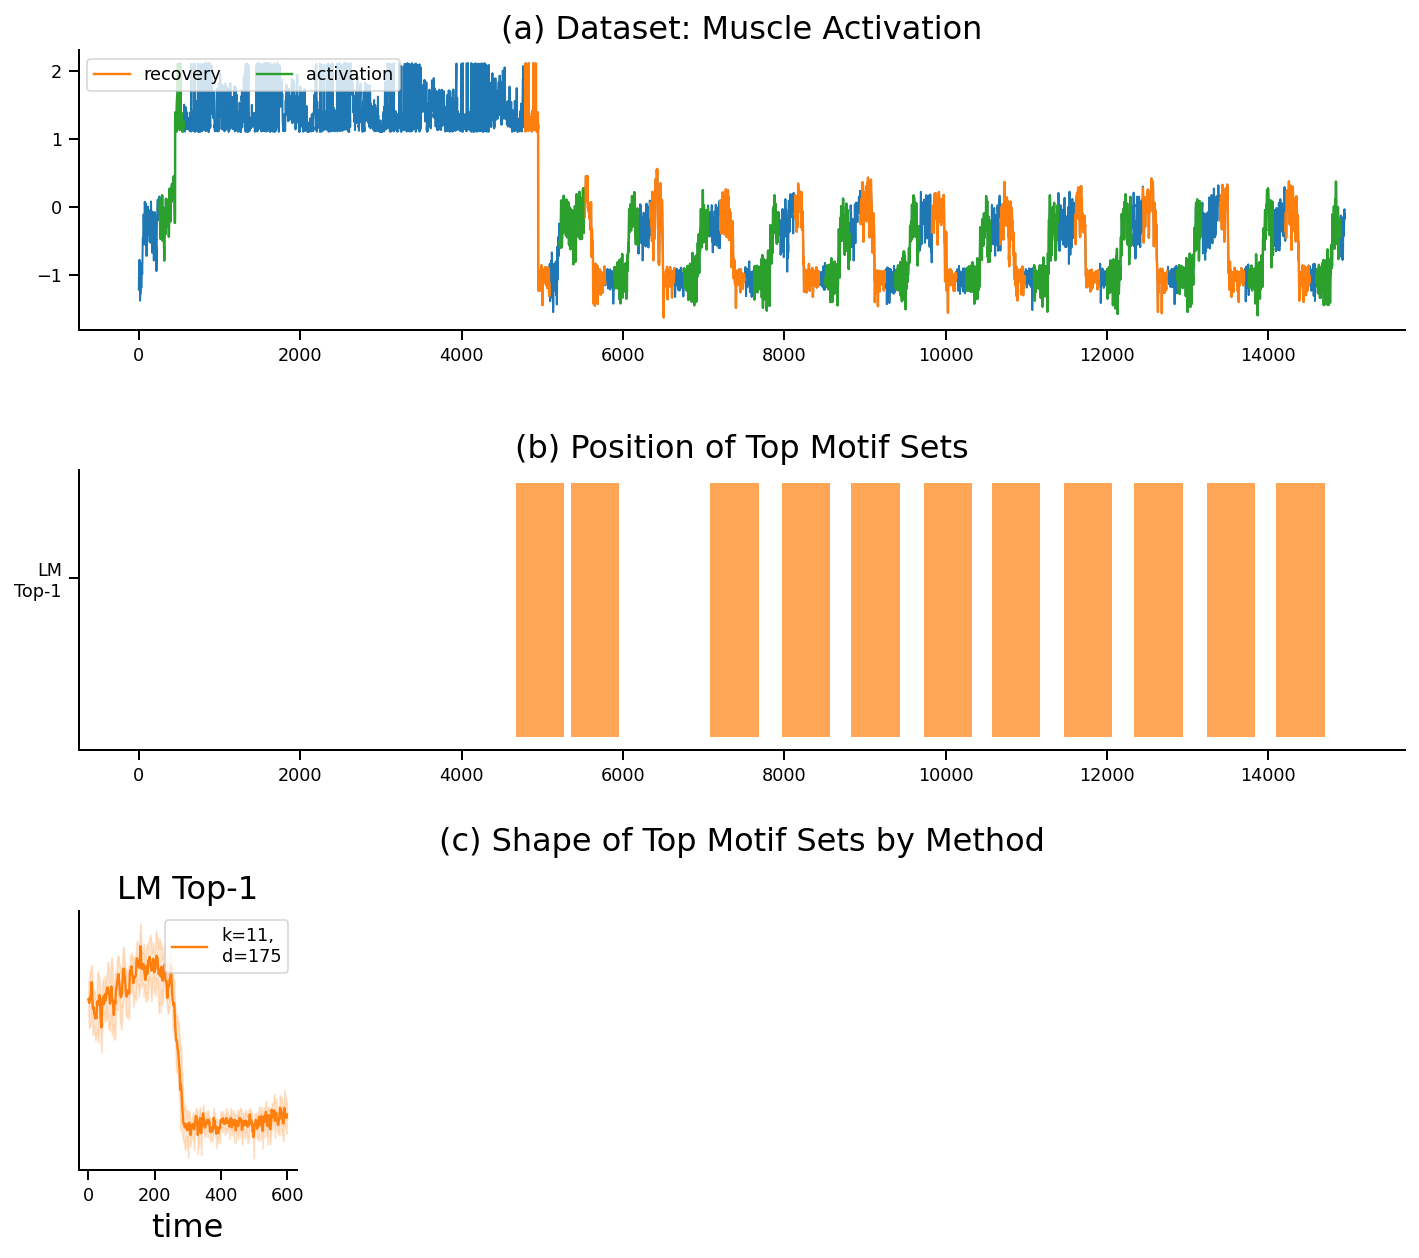

In [12]:
ms_learning_motifs = np.array([
	[5419,8038,8894,],
	[5435,8047,8918,12423,13321,],
	[5385,7109,7993,8855,9753,11491,12362,13259,14125,],
	[4673,5355,7082,7969,8831,9728,10575,11465,12340,13236,14098,],
	[4719,5392,7120,8005,8866,9765,10612,11502,12376,13273,14136,],    
])
    
motifset = plot_competitors(data, ds_name, ms_learning_motifs, motif_length, 
                 prefix="LM", ground_truth=df_gt)

df["LM Top-1"] = [motifset[-1]]
df_comp = append_all_motif_sets(df_comp, ms_learning_motifs, "LM", D_full)

# Comparison

In [13]:
df_2 = df.T
df_2.rename(columns={0:"offsets"}, inplace=True)
df_2

,offsets
Motiflets Top-1,"[6262, 13270, 5396, 8881, 12392, 10602, 8007, ..."
Set Finder Top-1,"[8861, 5369, 7112, 7986, 9754, 10590, 11475, 1..."
EMMA Top-1,"[5420, 7170, 8904, 9798, 11550, 12415, 13310, ..."
VALMOD Top-1,"[5438, 8047, 9801, 11553, 12423, 13312]"
LM Top-1,"[4673, 5355, 7082, 7969, 8831, 9728, 10575, 11..."


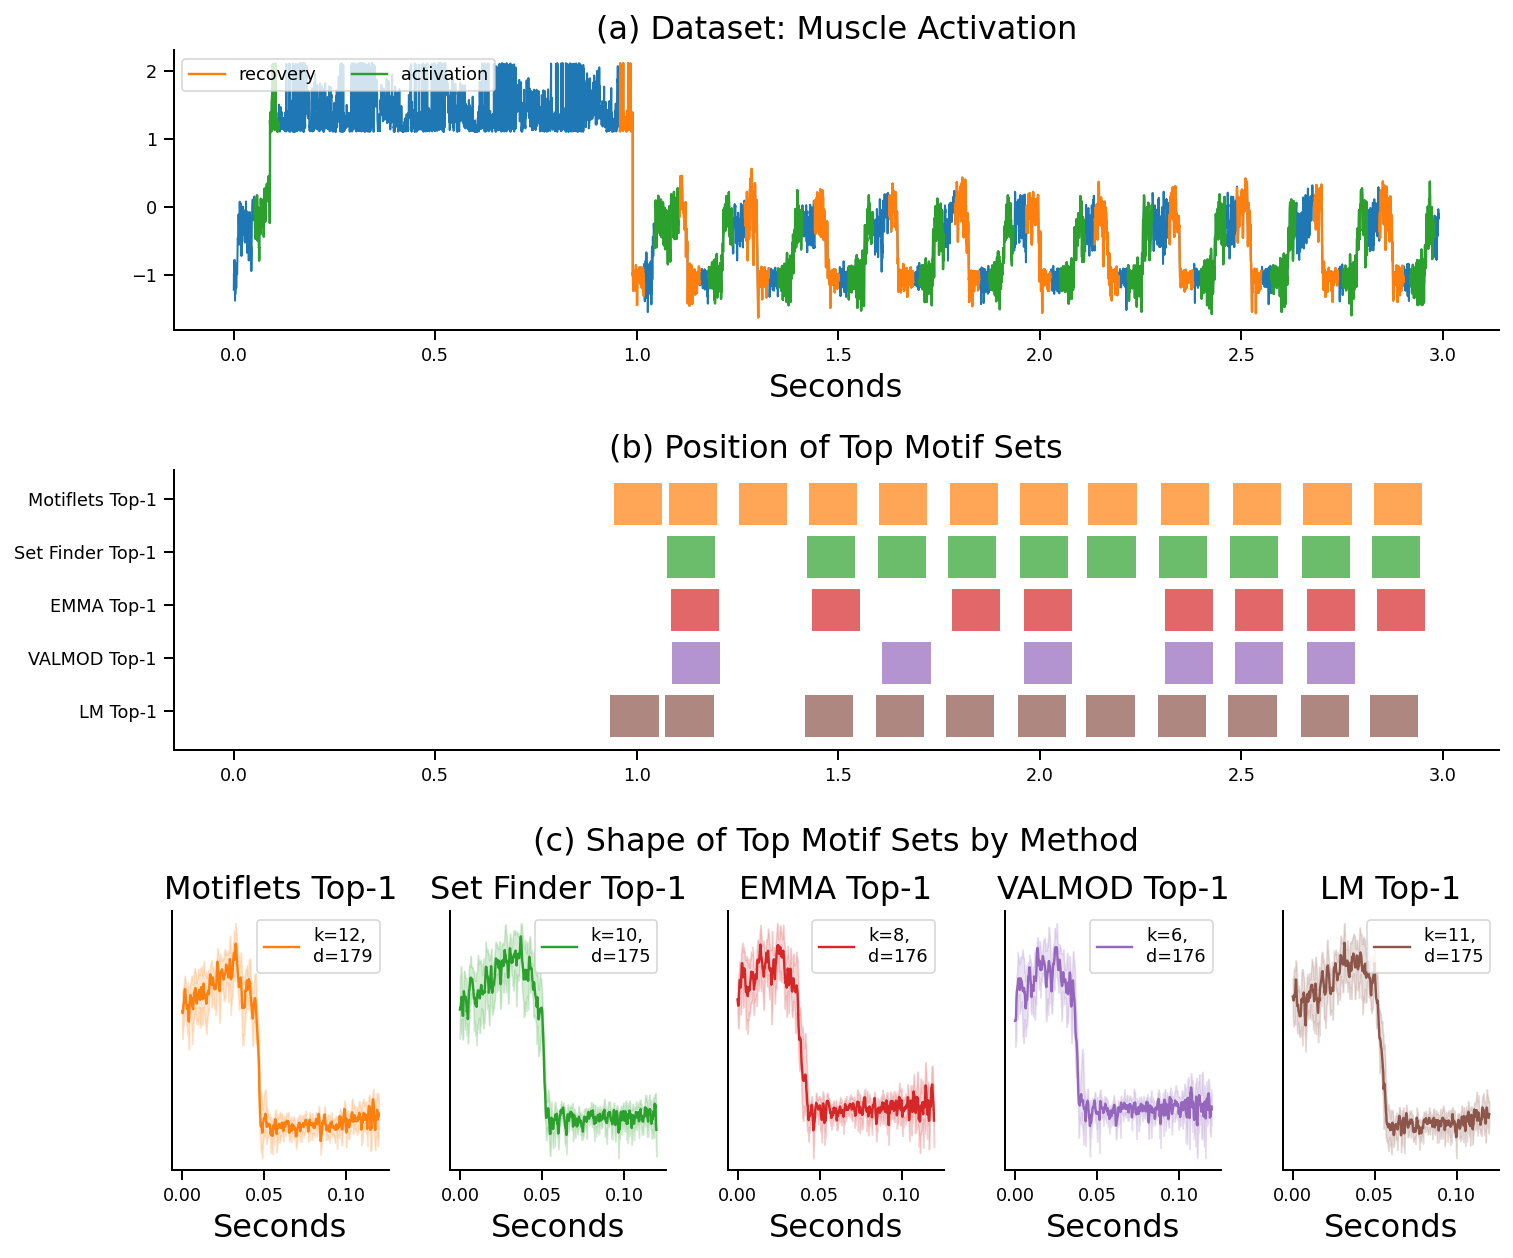

In [14]:
motifsets = np.array(df_2["offsets"].values)
plot_all_competitors(series, ds_name, motifsets, motif_length, 
                     method_names=df_2.index.values, ground_truth=df_gt)            

# Summary

In [15]:
extent = [ml.get_pairwise_extent(D_full, df_2.offsets[ind]) for ind in df_2.index]
count = [len(df_2.offsets[ind]) for ind in df_2.index]

df_statistics = pd.DataFrame(
    data=zip(df_2.index, extent, count), 
    columns=["Method", "Extent (d)", "Size (k)"])
df_statistics["Dataset"] = ds_name
display(df_statistics)

,Method,Extent (d),Cardinality (#),Dataset
0,Motiflets Top-1,179.291794,12,Muscle Activation
1,Set Finder Top-1,175.112213,10,Muscle Activation
2,EMMA Top-1,176.869415,8,Muscle Activation
3,VALMOD Top-1,176.474686,6,Muscle Activation
4,LM Top-1,175.941025,11,Muscle Activation


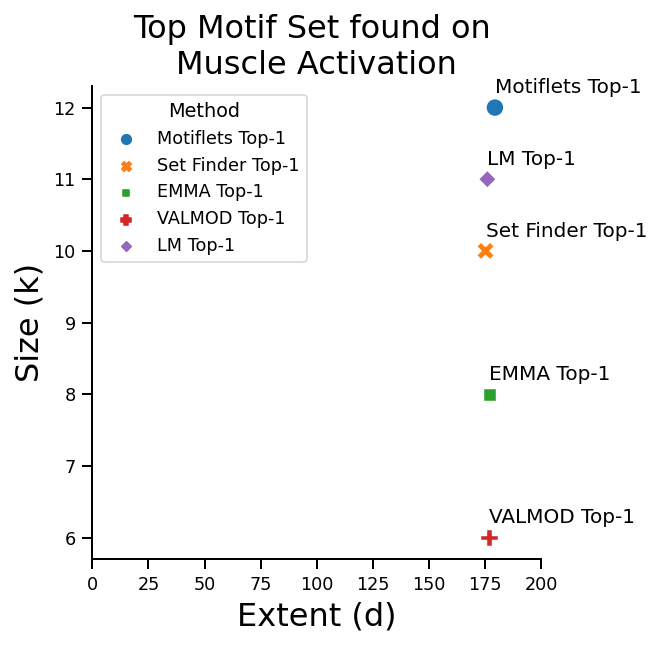

In [16]:
# Compare Relationship between size and extent
def annotate(ax, df):
    for ix, method, extent, cardinality, _ in df.itertuples():
        ax.annotate(
            method,
            (extent, cardinality+0.2),
            size = 10
        )

fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=df_statistics, 
                x="Extent (d)", y="Size (k)", hue="Method", 
                style="Method", s=80, ax=ax)
annotate(ax, df_statistics)
ax.set_title("Top Motif Set found on \n"+ ds_name)
ax.set_xlim([0,200])
ax.set_ylabel("Size (k)")
ax.set_xlabel("Extent (d)")
sns.despine()
plt.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(5)
#plt.savefig("../images/" + ds_name.replace(" ", "-")  + "_compare.pdf", bbox_inches='tight')

# Compare Relationship between size and extent

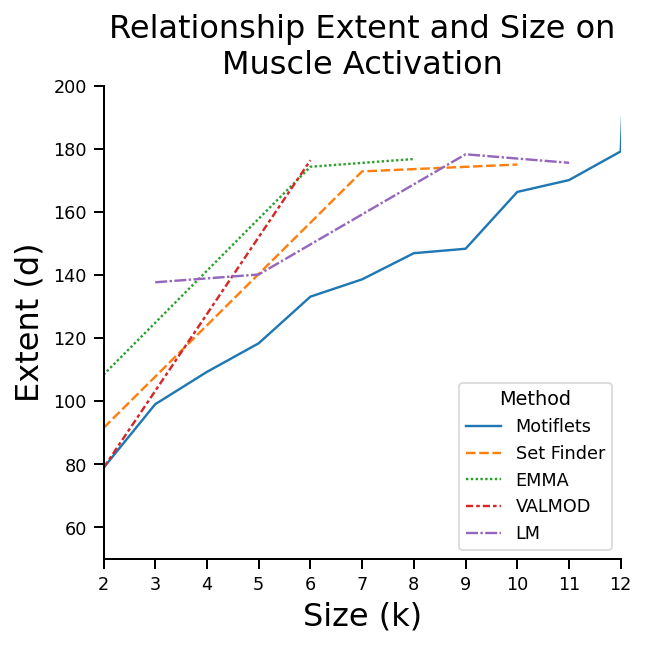

In [17]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("Relationship Extent and Size on\n" + ds_name)
sns.lineplot(x="k", y="Extent", data=df_comp, hue="Method", style="Method")
sns.despine()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim([2,12])
ax.set_ylim([50,200])
ax.set_xlabel("Size (k)")
ax.set_ylabel("Extent (d)")
plt.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(5)
#plt.savefig("../images/" + ds_name.replace(" ", "-")  + "_compare2.pdf", bbox_inches='tight')